In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.optim import SGD
from torch.nn import MSELoss
import copy

class MyModelClass(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = torch.nn.Linear(2,3)
        # self.l1 = torch.nn.Linear(2,16)
        # self.lu1 = torch.nn.ReLU()
        # self.l2 = torch.nn.Linear(16,32)
        # self.lu2 = torch.nn.ReLU()
        # self.l3 = torch.nn.Linear(32,1)

    def forward(self,x):
        x = self.l1(x) 
        x = torch.exp(x)
        ## x는 [[-1.2, 3.4, 2.1],[o,o,o],...,]]이런 상태
        x = x/(torch.sum(x,axis=1)).unsqueeze(1)
        # x = self.lu1(x) 
        # x = self.l2(x) 
        # x = self.lu2(x) 
        # x = self.l3(x)
        return x  

In [2]:
from sklearn import datasets
import numpy as np

samples, labels = datasets.make_blobs(n_samples=2000, centers=3, random_state=0)
samples.shape



(2000, 2)

In [3]:
model = MyModelClass()
s = torch.tensor(samples[0:5],dtype=torch.float32)
p = model(s)
print(p)
print(torch.argmax(p,dim=1))
p=torch.exp(p)
print(p)
p.gather(1,torch.tensor([[2],[1],[1],[0]]))


tensor([[0.1460, 0.2567, 0.5973],
        [0.1442, 0.2546, 0.6013],
        [0.0146, 0.1052, 0.8802],
        [0.0020, 0.0426, 0.9554],
        [0.0078, 0.0811, 0.9111]], grad_fn=<DivBackward0>)
tensor([2, 2, 2, 2, 2])
tensor([[1.1572, 1.2927, 1.8172],
        [1.1551, 1.2899, 1.8244],
        [1.0147, 1.1110, 2.4113],
        [1.0020, 1.0435, 2.5998],
        [1.0079, 1.0844, 2.4870]], grad_fn=<ExpBackward0>)


tensor([[1.8172],
        [1.2899],
        [1.1110],
        [1.0020]], grad_fn=<GatherBackward0>)

In [4]:
import numpy as np
a = np.array([1, 1, 1, 0, 0])
b = np.array([[5,5,5,5,5]])
b= b.T
print(a)
print(b)
b-a

[1 1 1 0 0]
[[5]
 [5]
 [5]
 [5]
 [5]]


array([[4, 4, 4, 5, 5],
       [4, 4, 4, 5, 5],
       [4, 4, 4, 5, 5],
       [4, 4, 4, 5, 5],
       [4, 4, 4, 5, 5]])

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import torch
# 정확도 hist 추가
# model(x)는 확률로 출력 ex)[0.05, 0.25, 0.7]
# 이후 외부에서 pred_idx = argmax(1)
# (t== pred_idx) -> [true ture false ...] -> sum() 하기
# 훈련 -> 1.0- model(x)[t] 를 MSE
model = MyModelClass()
optimizer = SGD(model.parameters(),lr=0.01)
loss_fn = MSELoss()

x_data = torch.tensor(samples,dtype=torch.float32)
t = torch.tensor(labels,dtype=torch.long)

num_epoch = 500
loss_hist=[]
model_hist =[]

accuracy_hist =[]
def train():
    global x_data,t,optimizer, loss_fn,loss_hist,model_hist,accuracy_hist,num_epoch

    for epoch in range(1,num_epoch+1):
        optimizer.zero_grad()
        y_pred = model(x_data)
        #acc
        pred_idx = torch.argmax(y_pred,1)
        acc = sum(t==pred_idx).detach()/len(samples)
        
        y_idx= y_pred.gather(1,torch.tensor(t.unsqueeze(1)))
        loss = (1.0-y_idx)**2 

        loss_sum = loss.sum()
        loss_sum.backward()
        optimizer.step()
        #loss_hist에 어떤 형태로, 몇 개 저장할 것인가?
        if epoch%(num_epoch//10)==0:
            print(f"Epoch {epoch}: loss = {loss_sum.item():.2f} acc = {acc.item():.2f}")
        loss_hist.append(loss_sum.item())
        model_hist.append(copy.deepcopy(model))
        accuracy_hist.append(acc.item())

    return loss_hist,model_hist,accuracy_hist
    


In [6]:
train()


C:\Users\gon\AppData\Local\Temp\ipykernel_17264\2360592687.py:31: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_idx= y_pred.gather(1,torch.tensor(t.unsqueeze(1)))


Epoch 50: loss = 132.67 acc = 0.92
Epoch 100: loss = 122.34 acc = 0.93
Epoch 150: loss = 122.48 acc = 0.93
Epoch 200: loss = 121.31 acc = 0.93
Epoch 250: loss = 120.11 acc = 0.93
Epoch 300: loss = 119.36 acc = 0.93
Epoch 350: loss = 118.89 acc = 0.93
Epoch 400: loss = 118.59 acc = 0.93
Epoch 450: loss = 118.39 acc = 0.93
Epoch 500: loss = 118.26 acc = 0.93


([1108.3477783203125,
  685.9373168945312,
  566.2633056640625,
  816.8458862304688,
  718.2444458007812,
  502.7184753417969,
  272.9874267578125,
  565.1715698242188,
  189.62448120117188,
  189.49664306640625,
  267.8497314453125,
  188.59588623046875,
  250.51280212402344,
  169.58657836914062,
  205.44166564941406,
  160.30548095703125,
  186.59213256835938,
  157.21498107910156,
  181.21768188476562,
  153.9168701171875,
  175.6214599609375,
  151.25790405273438,
  171.59063720703125,
  148.9013671875,
  168.2396240234375,
  146.8264617919922,
  165.4285125732422,
  144.97781372070312,
  162.9739532470703,
  143.321533203125,
  160.7667236328125,
  141.82864379882812,
  158.7307586669922,
  140.47463989257812,
  156.8157958984375,
  139.23812866210938,
  154.98867797851562,
  138.10067749023438,
  153.22833251953125,
  137.046875,
  151.52159118652344,
  136.06398010253906,
  149.86048889160156,
  135.1417999267578,
  148.2398223876953,
  134.27227783203125,
  146.65609741210938,

In [7]:
s = torch.tensor(samples[0:10],dtype=torch.float32)
p = model(s)
p = torch.argmax(p,1)
print(p)
print(labels[0:10])

tensor([2, 2, 0, 0, 1, 0, 1, 0, 1, 0])
[2 2 0 0 1 0 1 0 1 0]


In [8]:
def drawGraph():
    global x_data,t,loss_hist,model_hist,accuracy_hist

    fig,axs = plt.subplots(1,4,figsize=(12,3))

    axs[2].plot(np.arange(len(loss_hist)),loss_hist)    
    axs[3].plot(np.arange(len(accuracy_hist)),accuracy_hist)    

    axs[2].set_title('loss hist')
    axs[3].set_title('acc hist')
    plt.show()

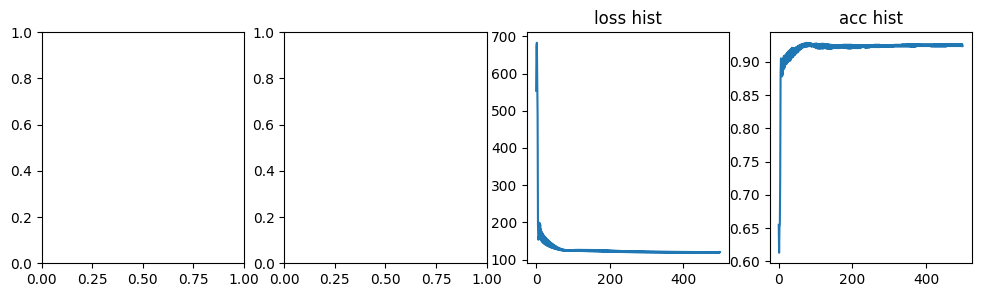

In [31]:
drawGraph()

In [29]:
print(samples[0:5])
x = torch.tensor(samples[0:5],dtype=torch.float32)
print(model(x).detach())
print(labels[0:5])

[[-1.64139106  3.16951251]
 [-2.29386705  4.09394254]
 [ 0.83269057  3.92176188]
 [ 2.60786751  4.6815465 ]
 [ 3.33872256  1.49561015]]
tensor([[6.7909e-04, 1.5934e-08, 9.9932e-01],
        [2.0053e-04, 3.8331e-12, 9.9980e-01],
        [9.9985e-01, 3.7594e-05, 1.1376e-04],
        [9.9999e-01, 1.3407e-05, 4.8934e-10],
        [3.9788e-05, 9.9996e-01, 1.8745e-12]])
[2 2 0 0 1]


In [9]:
samples, labels = datasets.make_blobs(n_samples=2000, centers=3, random_state=0)
samples.shape
# x-> [x.min, x.max]
# y-> [y.min, y.max]
# [x,x,x,x,..,x]
# [y,y,y,y,...,y].T
# 이걸 (2000,2)로 묶기 -> 이까지 한 게 meshgrid
x_range = np.linspace(samples[:,0].min(),samples[:,0].max(),100)
y_range = np.linspace(samples[:,1].min(),samples[:,1].max(),100)
X, Y = np.meshgrid(x_range, y_range)
data = np.stack((X.flatten(),Y.flatten()),1)
data = torch.tensor(data,dtype=torch.float32)
result = model(data)
max_idx = torch.argmax(result,dim=1)
max_idx


tensor([2, 2, 2,  ..., 0, 0, 0])

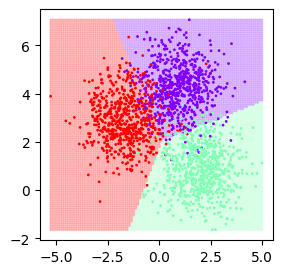

In [12]:
x = torch.tensor(samples,dtype=torch.float32)
sample_result= model(x)
sample_max_idx = torch.argmax(sample_result,dim=1)


plt.figure(figsize=(3,3))
plt.scatter(data[:,0],data[:,1],s=1,c=max_idx,cmap="rainbow",alpha=0.2)
#plt.scatter(samples[:,0],samples[:,1],s=1,c=sample_max_idx)
plt.scatter(samples[:,0],samples[:,1],s=1,c=labels,cmap="rainbow")